Reducing learning rate to 0.5
4a.
Learned weights: [-0.02228739  0.5541137   0.42924586  0.46526175  1.02221117  0.07198982
  1.10686754  0.64512634]
Test data cost: 0.4598029050984203


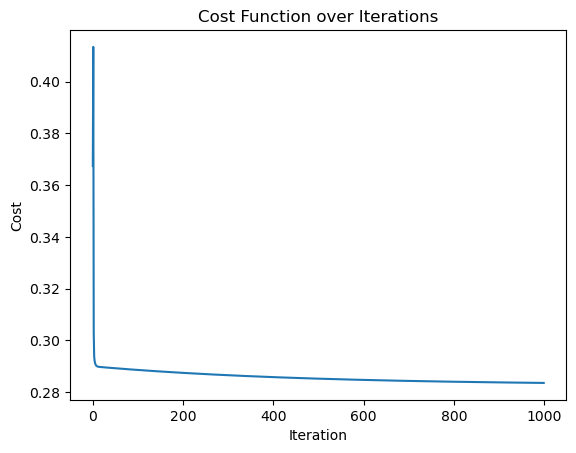

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv("Data/concrete/train.csv", header=None)
test_data = pd.read_csv("Data/concrete/test.csv", header=None)

# Separate features and target variable
X_train = train_data.iloc[:, :-1].values  # Features from training data
y_train = train_data.iloc[:, -1].values  # Target from training data
X_test = test_data.iloc[:, :-1].values  # Features from test data
y_test = test_data.iloc[:, -1].values  # Target from test data

# Add a bias term (column of 1s) to the features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize parameters
weights = np.zeros(X_train.shape[1])  # Initialize weights to zeros
learning_rate = 1.0  # Start with a relatively large learning rate
tolerance = 1e-6  # Convergence tolerance
max_iterations = 1000  # Maximum iterations to avoid infinite loops

# Batch gradient descent implementation
def compute_cost(X, y, weights):
    """Compute the Mean Squared Error (MSE) cost."""
    predictions = X.dot(weights)
    errors = predictions - y
    cost = (1 / (2 * len(y))) * np.sum(errors ** 2)
    return cost

cost_history = []  # To store cost values at each iteration
weight_history = []  # To store weight vector differences

for iteration in range(max_iterations):
    # Compute predictions
    predictions = X_train.dot(weights)

    # Compute gradient
    gradient = (1 / len(y_train)) * X_train.T.dot(predictions - y_train)

    # Update weights
    new_weights = weights - learning_rate * gradient

    # Check for convergence
    weight_diff = np.linalg.norm(new_weights - weights)
    if weight_diff < tolerance:
        print(f"Converged in {iteration + 1} iterations.")
        break

    # Update weights and track cost
    weights = new_weights
    cost = compute_cost(X_train, y_train, weights)
    cost_history.append(cost)
    weight_history.append(weight_diff)

    # Adjust learning rate if it diverges (optional tuning)
    if iteration > 0 and cost_history[-1] > cost_history[-2]:
        learning_rate /= 2
        print(f"Reducing learning rate to {learning_rate}")

# Report final weights and cost on the test set
print("4a.")
print("Learned weights:", weights)
test_cost = compute_cost(X_test, y_test, weights)
print(f"Test data cost: {test_cost}")

# Plot the cost function over iterations
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()


4b.
Learned weights: [-0.01189698  0.33524165  0.16832056  0.24202806  0.84847429  0.01005523
  0.82419713  0.44375764]
Test data cost: 0.4446884688491031


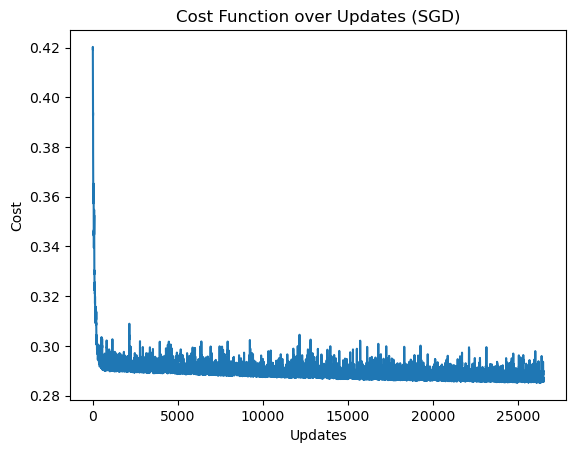

In [16]:
#b

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv("Data/concrete/train.csv", header=None)
test_data = pd.read_csv("Data/concrete/test.csv", header=None)

# Separate features and target variable
X_train = train_data.iloc[:, :-1].values  # Features from training data
y_train = train_data.iloc[:, -1].values  # Target from training data
X_test = test_data.iloc[:, :-1].values  # Features from test data
y_test = test_data.iloc[:, -1].values  # Target from test data

# Add bias term (column of 1s) to the features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Initialize parameters
weights = np.zeros(X_train.shape[1])  # Initialize weights to zeros
learning_rate = 0.01  #learning rate
max_epochs = 500  # number of epochs
tolerance = 1e-6  # Convergence tolerance

# Function to compute cost
def compute_cost(X, y, weights):
    """Compute the Mean Squared Error (MSE) cost."""
    predictions = X.dot(weights)
    errors = predictions - y
    cost = (1 / (2 * len(y))) * np.sum(errors ** 2)
    return cost

cost_history = []  # Store cost values over time

# Stochastic Gradient Descent (SGD)
for epoch in range(max_epochs):
    # Shuffle the data to ensure randomness
    indices = np.random.permutation(len(y_train))
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]
    
    for i in range(len(y_train)):
        # Get a random training example by shuffling the data
        xi = X_train_shuffled[i].reshape(1, -1)
        yi = y_train_shuffled[i]

        # Compute prediction and gradient
        prediction = xi.dot(weights)
        gradient = xi.T * (prediction - yi)

        # Update weights
        new_weights = weights - learning_rate * gradient.flatten()

        # Track cost after each update
        cost = compute_cost(X_train, y_train, new_weights)
        cost_history.append(cost)

        # Check for convergence
        if np.linalg.norm(new_weights - weights) < tolerance:
            print(f"Converged in epoch {epoch + 1}, iteration {i + 1}.")
            weights = new_weights
            break

        weights = new_weights

# Report final weights and test cost
print("4b.")
print("Learned weights:", weights)
print("Learning Rate:", learning_rate)
test_cost = compute_cost(X_test, y_test, weights)
print(f"Test data cost: {test_cost}")

# Plot the cost function over updates
plt.plot(cost_history)
plt.xlabel('Updates')
plt.ylabel('Cost')
plt.title('Cost Function over Updates (SGD)')
plt.show()


In [17]:
import numpy as np
import pandas as pd

# Load the dataset
train_data = pd.read_csv("Data/concrete/train.csv", header=None)
test_data = pd.read_csv("Data/concrete/test.csv", header=None)

# Separate features and target variable
X_train = train_data.iloc[:, :-1].values  # Features from training data
y_train = train_data.iloc[:, -1].values  # Target from training data

# Add bias term (column of 1s) to the features
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

# Calculate the optimal weight vector using the normal equation
X_transpose = X_train.T
optimal_weights = np.linalg.inv(X_transpose.dot(X_train)).dot(X_transpose).dot(y_train)

print("4c. ")
print("Optimal weight vector (analytical solution):", optimal_weights)

# Compute the cost of the test data using the optimal weight vector
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values
X_test = np.c_[np.ones(X_test.shape[0]), X_test]  # Add bias to test data

def compute_cost(X, y, weights):
    """Compute the Mean Squared Error (MSE) cost."""
    predictions = X.dot(weights)
    errors = predictions - y
    cost = (1 / (2 * len(y))) * np.sum(errors ** 2)
    return cost

test_cost = compute_cost(X_test, y_test, optimal_weights)
print(f"Test data cost (analytical solution): {test_cost}")


4c. 
Optimal weight vector (analytical solution): [-0.01519667  0.90056451  0.78629331  0.85104314  1.29889413  0.12989067
  1.57224887  0.99869359]
Test data cost (analytical solution): 0.4672352895987798


In [18]:
#4c
print("The weights for a and b are practically the same but a little different from part c. Part c's weights is the most accurate as it solves the system of equations directly, and it seems that batch gradient descent and stocastic gradient descent are better for approximating weights on large data sets.")

The weights for a and b are practically the same but a little different from part c. Part c's weights is the most accurate as it solves the system of equations directly, but
